# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Model Capacity

* import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Colab File Upload
 - Electric.csv & Cars.csv

In [3]:
!ls -l

total 56
-rw-r--r-- 1 root root 18276 Jul 18 02:26 Cars.csv
-rw-r--r-- 1 root root 29021 Jul 18 02:26 Electric.csv
drwxr-xr-x 1 root root  4096 Jul 10 16:29 sample_data


* pandas DataFrame

In [4]:
Elec = pd.read_csv('Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


* 산점도(surface_area vs. electricity)

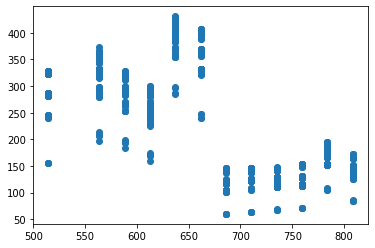

In [5]:
plt.scatter(Elec.surface_area, Elec.electricity)
plt.show()

> ## 1) 1차 모델 시각화

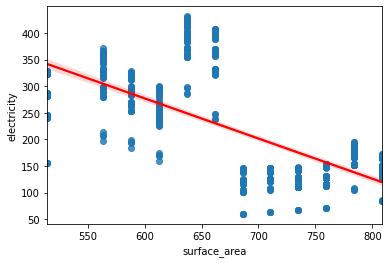

In [6]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'red'})
plt.show()

> ## 2) 2차 모델 시각화

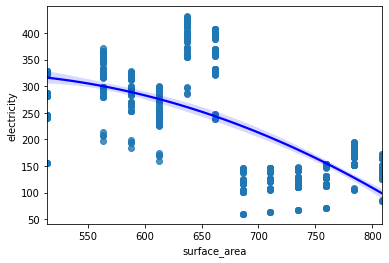

In [7]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            order = 2)
plt.show()

> ## 3) 5차 모델 시각화

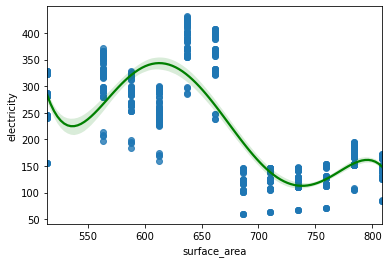

In [8]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            order = 5)
plt.show()

> ## 4) 9차 모델 시각화

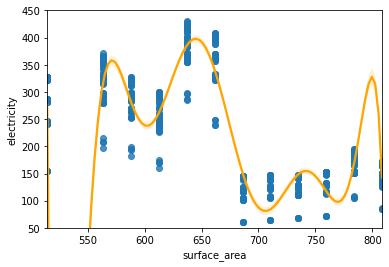

In [9]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            order = 9)
plt.ylim(50, 450)
plt.show()

> ## 5) 4개 모델 비교 시각화

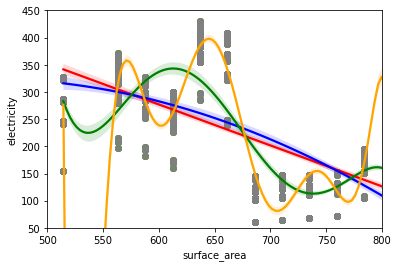

In [10]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {"color":"gray"})
plt.ylim(50, 450)
plt.xlim(500, 800)
plt.show()

# II. Training Error
* import Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* pandas DataFrame

In [12]:
Elec = pd.read_csv('Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


> ## 1) 1차 모델 Training Error

* Reshape X_train & y_train

In [13]:
X_train = Elec.surface_area.values.reshape(-1, 1)
y_train = Elec.electricity.values.reshape(-1, 1)

X_train.shape, y_train.shape

((768, 1), (768, 1))

* 모델 생성

In [14]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [15]:
print(Model_1.coef_)
print(Model_1.intercept_)

[[-0.75387157]]
[729.4538243]


* y(실제값) 지정

In [16]:
y = Elec.electricity.values.reshape(-1, 1)

y.shape

(768, 1)

* y_hat(예측값) 생성

In [17]:
y_hat_1 = Model_1.predict(X_train)

y_hat_1.shape

(768, 1)

* MSE(Mean Squared Error) 계산

In [18]:
TR_Err_1 = np.mean((y - y_hat_1) ** 2)

TR_Err_1

5763.983779426344

> ## 2) 5차 모델 Training Error

* 모델 생성

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [20]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [21]:
np.set_printoptions(suppress = True, precision = 8)

print(Model_5.coef_)
print(Model_5.intercept_)

[[-0.00031551 -0.10292968  0.00037876 -0.0000005   0.        ]]
[2906.22162538]


* y_hat(예측값) 생성

In [22]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768, 1)

* MSE(Mean Squared Error) 계산

In [23]:
TR_Err_5 = np.mean((y - y_hat_5) ** 2)

TR_Err_5

4177.726328606005

> ## 3) 9차 모델 Training Error

* 모델 생성

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

PX_9.shape

(768, 9)

In [25]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [26]:
print(Model_9.coef_)
print(Model_9.intercept_)

[[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]]
[-440.08258374]


* y_hat(예측값) 생성

In [27]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768, 1)

* MSE(Mean Squared Error) 계산

In [28]:
TR_Err_9 = np.mean((y - y_hat_9) ** 2)

TR_Err_9

4086.7199908149655

> ## 4) 3개 모델 Training Error 비교

In [29]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426344
5차 모델 :  4177.726328606005
9차 모델 :  4086.7199908149655


# III. Testing Error
* import Packages

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

* pandas DataFrame

In [31]:
Elec = pd.read_csv('Electric.csv')

len(Elec)

768

> ## Train_Data vs. Test_Data

### (1) DataFram Split
* 8:2 Split(614:154)
* 80% Train_DF & 20% Test_DF

In [32]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, test_size = 0.2, random_state = 2045)

In [33]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

* 80% TR_Elec DataFrame

In [34]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


* 20% TE_Elec DataFrame

In [35]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


### (2) Array Split
* X_train, X_test & y_train, y_test

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'], 
                                                    test_size = 0.2, random_state = 2045)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 1), (614,), (154, 1), (154,))

* 80% X_train Array

In [38]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


* 80% y_train Array

In [39]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

> ## 1) 1차 모델 Testing Error

* Train_Data로 모델 생성

In [40]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Test_Data로 y_hat(예측값) 생성

In [41]:
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

(154,)

* Test_Data로 MSE(Mean Squared Error) 계산

In [42]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

> ## 2) 5차 모델 Testing Error

* Train_Data로 모델 생성

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [44]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Test_Data로 y_hat(예측값) 생성

In [45]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [46]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.604566409588

> ## 3) 9차 모델 Testing Error

* Train_Data로 모델 생성

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [48]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Test_Data로 y_hat(예측값) 생성

In [49]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [50]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067137622

> ## 4) 3개 모델 Testing Error 비교

In [51]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4330.604566409588
9차 모델 :  4238.689067137622


# IV. Validation Approach
* import Packages

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* pandas DataFrame

In [53]:
CARS = pd.read_csv('Cars.csv')

CARS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


* 산점도(weight vs. mpg)

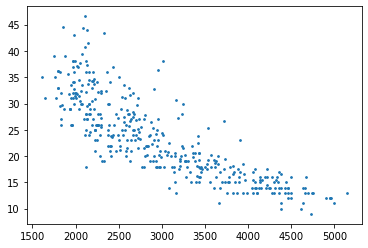

In [54]:
plt.scatter(CARS.weight, CARS.mpg, s = 3)
plt.show()

> ## Train vs. Validation vs. Test
* 6:2:2 Split(234:79:79)

> ## sklearn Package 사용
* train_test_split( )

* 20% Test_Data(79)

In [55]:
from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(CARS[['weight']], CARS['mpg'], 
                                                      test_size = 0.2, random_state = 2045)

X_remain.shape, y_remain.shape, X_test.shape, y_test.shape

((313, 1), (313,), (79, 1), (79,))

* 60% Train_Data(234) & 20% Validation_Data(79)

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = 79, random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((234, 1), (234,), (79, 1), (79,))

> ## 1) 1차 모델 Validation Error

* Train_Data로 모델 생성

In [57]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [58]:
from sklearn.metrics import mean_squared_error

MSE_1 = mean_squared_error(y_valid, Model_1.predict(X_valid))
MSE_1

18.707530645247076

> ## 2) 9차 모델 Validation Error

* Train_Data로 모델 생성

In [59]:
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [60]:
from sklearn.metrics import mean_squared_error

PX9_valid = poly.fit_transform(X_valid)

MSE_9 = mean_squared_error(y_valid, Model_9.predict(PX9_valid))
MSE_9

17.268383037048025

> ## 3) 2개 모델 Validation Error 비교

In [61]:
print('1차 모델 MSE_1  : ', MSE_1)
print('9차 모델 MSE_9  : ', MSE_9)

1차 모델 MSE_1  :  18.707530645247076
9차 모델 MSE_9  :  17.268383037048025


> ## 4) 최종 9차 모델을 Test_Data에 적용

* Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [62]:
PX9_TE = poly.fit_transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX9_TE))

9.431821945902385

# 
# 
# 
# The End
# 
# 
# 